In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry import box
import matplotlib.patches as patches
import random
from shapely.geometry import Point
import matplotlib.pyplot as plt
from copy import copy



In [2]:
plz_shape_df = gpd.read_file('../geodata/plz-5stellig.shp', dtype={'plz': str})

In [3]:
plz_region_df = pd.read_csv('../geodata/zuordnung_plz_ort.csv', sep=',', dtype={'plz': str})
plz_region_df.drop('osm_id', axis=1, inplace=True)

germany_df = pd.merge(left=plz_shape_df, right=plz_region_df, on='plz', how='inner')
düsseldorf_df = germany_df.query('ort == "Düsseldorf"')
düsseldorf_geo = düsseldorf_df["geometry"]

In [4]:
düsseldorf_geo

2097    POLYGON ((6.72355 51.22594, 6.72503 51.22725, ...
2098    POLYGON ((6.76574 51.21918, 6.76601 51.21933, ...
2099    POLYGON ((6.79353 51.20945, 6.79742 51.20828, ...
2100    POLYGON ((6.76206 51.21091, 6.76234 51.21133, ...
2106    POLYGON ((6.76978 51.21722, 6.77078 51.21683, ...
2178    POLYGON ((6.79501 51.24699, 6.79554 51.24727, ...
2180    POLYGON ((6.79729 51.23639, 6.79734 51.23712, ...
2181    POLYGON ((6.82197 51.24561, 6.82226 51.24573, ...
2182    POLYGON ((6.79591 51.22468, 6.79668 51.22513, ...
2183    POLYGON ((6.81420 51.21123, 6.81654 51.21334, ...
2184    POLYGON ((6.79066 51.21287, 6.79089 51.21558, ...
2185    POLYGON ((6.77741 51.21845, 6.77845 51.21852, ...
2221    POLYGON ((6.76349 51.22105, 6.76530 51.22218, ...
2242    POLYGON ((6.78129 51.22853, 6.78254 51.22644, ...
2243    POLYGON ((6.81435 51.20423, 6.81439 51.20537, ...
2258    POLYGON ((6.80393 51.18063, 6.80441 51.18088, ...
2260    POLYGON ((6.78399 51.22569, 6.78559 51.22541, ...
2263    MULTIP

In [5]:
germany_df.columns

Index(['plz', 'note', 'einwohner', 'qkm', 'geometry', 'ags', 'ort',
       'landkreis', 'bundesland'],
      dtype='object')

In [6]:
def generate_random_location_within_ROI(num_pt, polygon):
  """
  Generate num_pt random location coordinates .
  :param num_pt INT number of random location coordinates
  :param polygon geopandas.geoseries.GeoSeries the polygon of the region
  :return x, y lists of location coordinates, longetude and latitude
  """
  # define boundaries
  bounds_all = polygon.bounds
  minx = min(bounds_all.minx)
  maxx = max(bounds_all.maxx)
  miny = min(bounds_all.miny)
  maxy = max(bounds_all.maxy)

  i = 0
  x = []
  y = []
  while i < num_pt:
    # generate random location coordinates
    x_t = np.random.uniform(minx, maxx)
    y_t = np.random.uniform(miny, maxy)
    # further check whether it is in the city area
    for p in polygon:
      if Point(x_t, y_t).within(p):
        x.append(x_t)
        y.append(y_t)
        i = i + 1
        break

  return x, y

In [8]:
plz_centroids_df = gpd.read_file('../geodata/plz-5stellig-centroid.shp', dtype={'plz': str})

In [9]:
germany_centroids_df = pd.merge(left=plz_centroids_df, right=plz_region_df, on='plz', how='inner')

In [10]:
germany_centroids_df.columns

Index(['plz', 'note', 'einwohner', 'qkm', 'geometry', 'ags', 'ort',
       'landkreis', 'bundesland'],
      dtype='object')

In [11]:
düsseldorf_c_df = germany_centroids_df.query('ort == "Düsseldorf"')
düsseldorf_c_geo = düsseldorf_df["geometry"]

In [12]:
düsseldorf_c_geo

2097    POLYGON ((6.72355 51.22594, 6.72503 51.22725, ...
2098    POLYGON ((6.76574 51.21918, 6.76601 51.21933, ...
2099    POLYGON ((6.79353 51.20945, 6.79742 51.20828, ...
2100    POLYGON ((6.76206 51.21091, 6.76234 51.21133, ...
2106    POLYGON ((6.76978 51.21722, 6.77078 51.21683, ...
2178    POLYGON ((6.79501 51.24699, 6.79554 51.24727, ...
2180    POLYGON ((6.79729 51.23639, 6.79734 51.23712, ...
2181    POLYGON ((6.82197 51.24561, 6.82226 51.24573, ...
2182    POLYGON ((6.79591 51.22468, 6.79668 51.22513, ...
2183    POLYGON ((6.81420 51.21123, 6.81654 51.21334, ...
2184    POLYGON ((6.79066 51.21287, 6.79089 51.21558, ...
2185    POLYGON ((6.77741 51.21845, 6.77845 51.21852, ...
2221    POLYGON ((6.76349 51.22105, 6.76530 51.22218, ...
2242    POLYGON ((6.78129 51.22853, 6.78254 51.22644, ...
2243    POLYGON ((6.81435 51.20423, 6.81439 51.20537, ...
2258    POLYGON ((6.80393 51.18063, 6.80441 51.18088, ...
2260    POLYGON ((6.78399 51.22569, 6.78559 51.22541, ...
2263    MULTIP

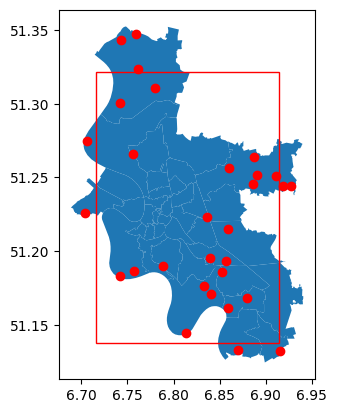

In [13]:
x, y = generate_random_location_within_ROI(30, düsseldorf_c_geo)
bounds_all = düsseldorf_c_df["geometry"].bounds
minx = min(bounds_all.minx)
maxx = max(bounds_all.maxx)
miny = min(bounds_all.miny)
maxy = max(bounds_all.maxy)
ax = düsseldorf_df.plot()

rect = patches.Rectangle((minx, miny), maxx-minx, maxy-miny, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.plot(x, y, "ro")
plt.show()

In [58]:
p = Point(50.7597503, 13.742591)
p2 = Point(13.742591,50.7597503)


In [59]:
germany2_geo = germany_df['geometry']

In [78]:
match = germany2_geo.contains(p2)
print(germany_df[match]['ort'].to_string(index=False))
matched_geo=germany_df[match]['geometry']

Altenberg


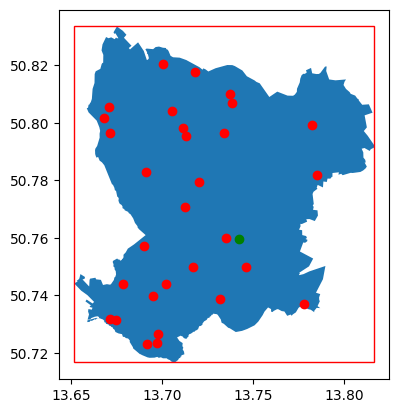

In [69]:
x, y = generate_random_location_within_ROI(30, matched_geo)
bounds_all = matched_geo.bounds
minx = min(bounds_all.minx)
maxx = max(bounds_all.maxx)
miny = min(bounds_all.miny)
maxy = max(bounds_all.maxy)
ax = matched_geo.plot()

rect = patches.Rectangle((minx, miny), maxx-minx, maxy-miny, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.plot(x, y, "ro")
ax.plot(p2.x,p2.y,"go")
plt.show()

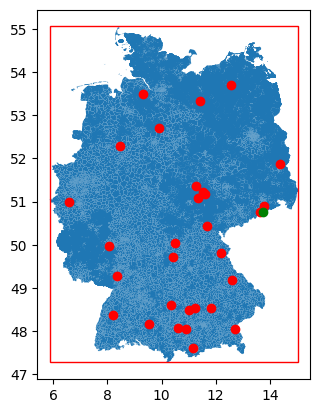

In [70]:
germany_geo = germany_df['geometry']
x, y = generate_random_location_within_ROI(30, germany_geo)
bounds_all = germany_geo.bounds
minx = min(bounds_all.minx)
maxx = max(bounds_all.maxx)
miny = min(bounds_all.miny)
maxy = max(bounds_all.maxy)
ax = germany_geo.plot()

rect = patches.Rectangle((minx, miny), maxx-minx, maxy-miny, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.plot(x, y, "ro")
ax.plot(p2.x,p2.y,"go")
plt.show()

In [72]:
y

[53.70519928706912,
 51.17530937620963,
 50.04335644129525,
 53.32736928558142,
 48.539038478652394,
 51.07318087761409,
 51.22604597890153,
 50.42499444966644,
 48.38114560019848,
 49.96705222627323,
 48.5914790914258,
 48.044311175257604,
 51.37170822482171,
 49.273589239101284,
 49.180201519999194,
 47.61068610362556,
 49.81294086925516,
 52.283524796633415,
 51.88017089227188,
 49.70865700539384,
 50.99374683292359,
 50.88710245603464,
 48.527644992510425,
 53.50219416926052,
 48.06912560278054,
 48.48608250993567,
 52.71458635103187,
 48.150926968545285,
 50.75462886076638,
 48.03968348378668]

In [91]:
def get_city_from_geolocation(lon,lat, geolocation_df=germany_df):
    geolocation_geo = geolocation_df['geometry']
    p=Point(lon,lat)
    match = geolocation_geo.contains(p)
    ort = geolocation_df[match]['ort'].head(1).to_string(index=False)
    plz = geolocation_df[match]['plz'].head(1).to_string(index=False)
    return ort,plz

In [92]:
get_city_from_geolocation(10.910502476799723,51.41204778678551)

('Görsbach', '99765')